<a href="https://colab.research.google.com/github/sivask01/CMPE257-Fall23-Sivakrishna-Yaganti/blob/class-activities/Class_Activity_1_PLA_and_Pocket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np

path = "/content/drive/MyDrive/Colab Notebooks/ML/synthetic_dataset.csv"
df = pd.read_csv(path)

In [6]:
# df

In [7]:
X = df[['x1', 'x2']].to_numpy()
y = df['y'].to_numpy()
# y = np.where(y == 0, -1, 1)

In [17]:
# Perceptron Learning Algorithm
def perceptron_learning_algorithm(X, y, learning_rate=0.1, max_iterations=None):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features + 1)  # Initialize weights to zeros (including bias)
    X_with_bias = np.hstack((np.ones((num_samples, 1)), X))  # Add a bias term to X
    iteration = 0
    while True:
        misclassified = False
        for i in range(num_samples):
            prediction = np.dot(X_with_bias[i], weights)
            if y[i]*prediction <= 0:
                weights += learning_rate*y[i]*X_with_bias[i]
                misclassified = True
        iteration+=1
        if not misclassified or (max_iterations is not None and iteration >= max_iterations):
            break
    return weights

# Pocket Algorithm
def pocket_algorithm(X, y, learning_rate = 0.1, max_iterations=None):
    num_samples, num_features = X.shape
    w = np.zeros(num_features + 1)  # Initialize weights to zeros (including bias)
    # w = [0, 0, 0]
    w_pocket = np.copy(w)           # Initialize the pocket weight vector
    X_with_bias = np.hstack((np.ones((num_samples, 1)), X))  # Add a bias term to X
    min_misclassified = num_samples
    iteration = 0
    while True:
        misclassified = 0
        for i in range(num_samples):
            prediction = np.dot(X_with_bias[i], w)
            if y[i]*prediction <= 0:
                w += y[i]*X_with_bias[i]
                misclassified += 1
        if misclassified < min_misclassified:
            min_misclassified = misclassified
            w_pocket = np.copy(w)
        iteration+=1
        if max_iterations is not None and iteration >= max_iterations:
            break

    print(min_misclassified)
    return w_pocket

In [18]:
import matplotlib.pyplot as plt
# Plot dataset and final hypothesis
def plot_dataset_and_hypothesis(X, y, w, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=10)
    x_points = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    y_points = (-w[0] - w[1] * x_points) / w[2]
    plt.plot(x_points, y_points, '-r', label='Final Hypothesis', linewidth=0.5)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.legend()
    plt.show()

final_w = perceptron_learning_algorithm(X, y, learning_rate=0.1)
final_w_pocket = pocket_algorithm(X, y, learning_rate = 0.1, max_iterations=50)


0


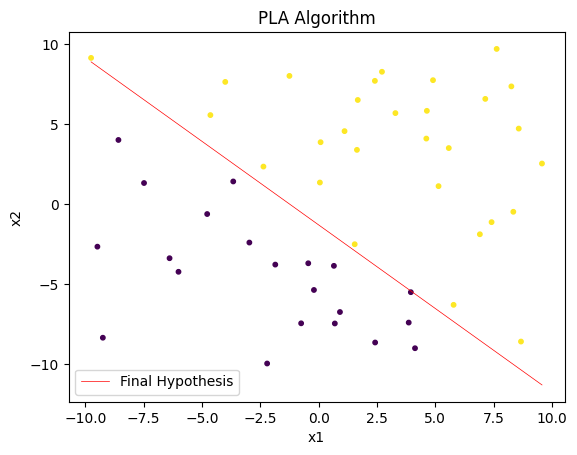

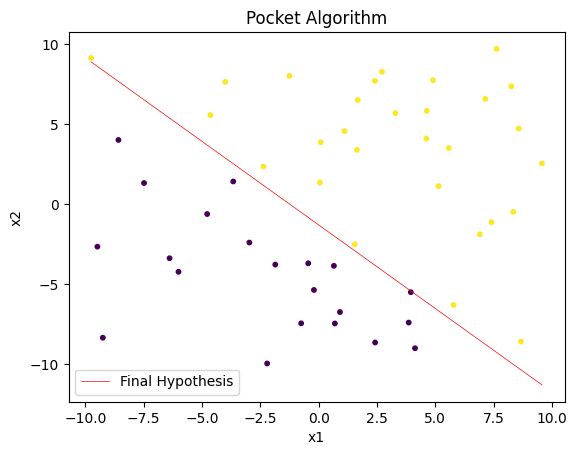

In [19]:
# Plot the dataset and final hypothesis
plot_dataset_and_hypothesis(X, y, final_w, 'PLA Algorithm')
plot_dataset_and_hypothesis(X, y, final_w_pocket, 'Pocket Algorithm')